In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np

# 字典特征数据抽取

In [2]:
# 实例化
vector=CountVectorizer()

#调用fit_transform输入并转换数据
res = vector.fit_transform(["life is short,i like python","life is too long,i dislike python"])

In [3]:
vector.get_feature_names()

['dislike', 'is', 'life', 'like', 'long', 'python', 'short', 'too']

In [4]:
res.toarray()

array([[0, 1, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 1]], dtype=int64)

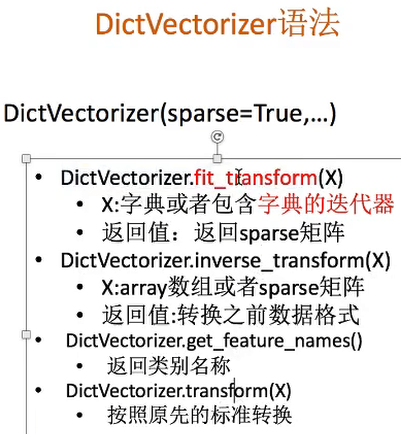

In [5]:
# 实例化
dict = DictVectorizer(sparse=False)  # 默认为True

# 调用fit_transform
data = dict.fit_transform([{'city': '北京','temperature': 100}, {'city': '上海','temperature':60}, {'city': '深圳','temperature': 30}])

print(dict.get_feature_names())   # 把字典中一些类别的数据，分别进行转换成特征值，数字和浮点不转换

print(dict.inverse_transform(data))

print(data, type(data))    # one-hot编码形式
data

['city=上海', 'city=北京', 'city=深圳', 'temperature']
[{'city=北京': 1.0, 'temperature': 100.0}, {'city=上海': 1.0, 'temperature': 60.0}, {'city=深圳': 1.0, 'temperature': 30.0}]
[[  0.   1.   0. 100.]
 [  1.   0.   0.  60.]
 [  0.   0.   1.  30.]] <class 'numpy.ndarray'>


array([[  0.,   1.,   0., 100.],
       [  1.,   0.,   0.,  60.],
       [  0.,   0.,   1.,  30.]])

In [6]:
# 实例化
dict = DictVectorizer(sparse=True)  # scipy格式

# 调用fit_transform
data = dict.fit_transform([{'city': '北京','temperature': 100}, {'city': '上海','temperature':60}, {'city': '深圳','temperature': 30}])

print(dict.get_feature_names())

print(dict.inverse_transform(data))

print(data, type(data))

['city=上海', 'city=北京', 'city=深圳', 'temperature']
[{'city=北京': 1.0, 'temperature': 100.0}, {'city=上海': 1.0, 'temperature': 60.0}, {'city=深圳': 1.0, 'temperature': 30.0}]
  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0 <class 'scipy.sparse.csr.csr_matrix'>


# jieba

In [7]:
con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")

con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")

con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

# 转换成列表
content1 = list(con1)
content2 = list(con2)
content3 = list(con3)

# 吧列表转换成字符串
c1 = ' '.join(content1)
c2 = ' '.join(content2)
c3 = ' '.join(content3)

print('content1:', content1)
print('content2:', content2)
print('content3:', content3)

print('c1:', c1)
print('c2:', c2)
print('c3:', c3)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\82134\AppData\Local\Temp\jieba.cache
Loading model cost 0.712 seconds.
Prefix dict has been built succesfully.


content1: ['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
content2: ['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
content3: ['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
c1: 今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
c2: 我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
c3: 如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。


# 文本特征抽取

In [8]:
cv = CountVectorizer()

data = cv.fit_transform([c1, c2, c3])

print(cv.get_feature_names())

data.toarray()

['一种', '不会', '不要', '之前', '了解', '事物', '今天', '光是在', '几百万年', '发出', '取决于', '只用', '后天', '含义', '大部分', '如何', '如果', '宇宙', '我们', '所以', '放弃', '方式', '明天', '星系', '晚上', '某样', '残酷', '每个', '看到', '真正', '秘密', '绝对', '美好', '联系', '过去', '这样']


array([[0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 4, 3, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0]], dtype=int64)

# TF IDF
> 如果某个词在一篇文章出现频率高而在其他文章出现少，则这个词可以很好的用来分类。  

> tf == term qrequency          
>>- 词的频率  
>>- 出现的次数   

> idf == inverse document frequency           
>>- 逆文档频率  
>>- log(总文档数量 / 该词出现的文档数量)

In [9]:
tf = TfidfVectorizer()

data = tf.fit_transform([c1, c2, c3])

print(tf.get_feature_names())

data.toarray()

['一种', '不会', '不要', '之前', '了解', '事物', '今天', '光是在', '几百万年', '发出', '取决于', '只用', '后天', '含义', '大部分', '如何', '如果', '宇宙', '我们', '所以', '放弃', '方式', '明天', '星系', '晚上', '某样', '残酷', '每个', '看到', '真正', '秘密', '绝对', '美好', '联系', '过去', '这样']


array([[0.        , 0.        , 0.21821789, 0.        , 0.        ,
        0.        , 0.43643578, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21821789, 0.        , 0.21821789,
        0.        , 0.        , 0.        , 0.        , 0.21821789,
        0.21821789, 0.        , 0.43643578, 0.        , 0.21821789,
        0.        , 0.43643578, 0.21821789, 0.        , 0.        ,
        0.        , 0.21821789, 0.21821789, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.2410822 , 0.        ,
        0.        , 0.        , 0.2410822 , 0.2410822 , 0.2410822 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2410822 , 0.55004769, 0.        ,
        0.        , 0.        , 0.        , 0.2410822 , 0.        ,
        0.        , 0.        , 0.        , 0.48216441, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2410822 ,
        0.2410822 ],
      

#  归一化处理
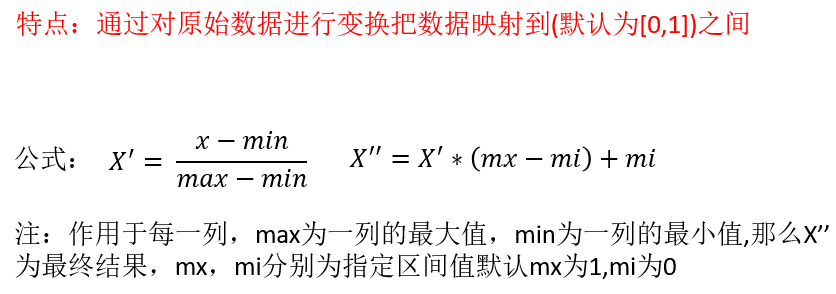

In [10]:
mm = MinMaxScaler(feature_range=(2, 3))  # 默认(0, 1)之间

data = mm.fit_transform([[90,2,10,40],[60,4,15,45],[75,3,13,46]])

data

array([[3.        , 2.        , 2.        , 2.        ],
       [2.        , 3.        , 3.        , 2.83333333],
       [2.5       , 2.5       , 2.6       , 3.        ]])

#  标准化缩放

In [11]:
std = StandardScaler()

data = std.fit_transform([[ 1., -1., 3.],[ 2., 4., 2.],[ 4., 6., -1.]])

data

array([[-1.06904497, -1.35873244,  0.98058068],
       [-0.26726124,  0.33968311,  0.39223227],
       [ 1.33630621,  1.01904933, -1.37281295]])

# 缺失值处理
> 缺失值必须是np.nan   
pandas.replce('?', np.nan)

In [13]:
# NaN, nan
im = Imputer(missing_values='NaN', strategy='mean', axis=0) # NaN用mean填补

data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

print(data)

[[1. 2.]
 [4. 3.]
 [7. 6.]]


# 特征选择-删除低方差的特征

In [14]:
var = VarianceThreshold(threshold=1.0)

data = var.fit_transform([[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]])

print(data)

[[0]
 [4]
 [1]]


# PCA-->主成分分析进行特征降维
> 维度降低，尽可能保持数据，特征数量非常多才用

In [18]:
pca = PCA(n_components=0.9)  # 保留0。9的内容

data = pca.fit_transform([[2,8,4,5],[6,3,0,8],[5,4,9,1]])

print(data)

[[ 1.22879107e-15  3.82970843e+00]
 [ 5.74456265e+00 -1.91485422e+00]
 [-5.74456265e+00 -1.91485422e+00]]


# 数组的划分与介绍

## 数据引入

In [19]:
from sklearn.datasets import load_iris

In [23]:
li = load_iris()
li.data[:50]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
li.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
li

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## 数据划分

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
# x:特征值 y:目标值 train:训练集 test:测试集
x_train, x_test, y_train, y_test = train_test_split(li.data, li.target, test_size=0.25)

In [31]:
x_train, x_test, y_train, y_test

(array([[5. , 3.3, 1.4, 0.2],
        [5.4, 3.9, 1.3, 0.4],
        [7.4, 2.8, 6.1, 1.9],
        [5.7, 2.9, 4.2, 1.3],
        [6.3, 3.4, 5.6, 2.4],
        [5.9, 3. , 4.2, 1.5],
        [6.3, 3.3, 4.7, 1.6],
        [6.7, 2.5, 5.8, 1.8],
        [5.6, 3. , 4.5, 1.5],
        [6.1, 2.9, 4.7, 1.4],
        [5.7, 3. , 4.2, 1.2],
        [4.8, 3. , 1.4, 0.3],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 2.7, 3.9, 1.4],
        [5.9, 3.2, 4.8, 1.8],
        [7.3, 2.9, 6.3, 1.8],
        [4.6, 3.1, 1.5, 0.2],
        [7.9, 3.8, 6.4, 2. ],
        [5.8, 2.7, 4.1, 1. ],
        [6.1, 2.8, 4. , 1.3],
        [6.2, 3.4, 5.4, 2.3],
        [4.9, 2.5, 4.5, 1.7],
        [5.8, 4. , 1.2, 0.2],
        [6.9, 3.1, 4.9, 1.5],
        [4.7, 3.2, 1.6, 0.2],
        [5.5, 2.3, 4. , 1.3],
        [6.7, 3.3, 5.7, 2.1],
        [6.3, 2.7, 4.9, 1.8],
        [7.2, 3.6, 6.1, 2.5],
        [5.4, 3.4, 1.7, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [5.6, 2.7, 4.2, 1.3],
        [5

---

In [38]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups()  # 默认下载所有数据

KeyboardInterrupt: 

In [ ]:
news.data, news.target

---

In [35]:
from sklearn.datasets import load_boston
lb = load_boston()
lb.data, lb.target

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

---

# KNN -- K近邻算法 

In [43]:
import pandas as pd

---

In [58]:
data = pd.read_csv(r".\data\facebook-v-predicting-check-ins\test.csv")
data.head(10)

,row_id,x,y,accuracy,time
0,0,0.1675,1.3608,107,930883
1,1,7.3909,2.5301,35,893017
2,2,8.0978,2.3473,62,976933
3,3,0.9990,1.0591,62,907285
4,4,0.6670,9.7254,40,914399
5,5,0.1771,0.0022,161,814077
6,6,5.5299,4.6581,2,930759
7,7,8.6021,3.1744,4,862115
8,8,4.2250,6.3435,162,787391
9,9,0.6489,6.2611,39,793166


In [55]:
data = data.query("x > 1.0 &  x < 1.25 & y > 2.5 & y < 2.75")

# 处理时间的数据
time_value = pd.to_datetime(data['time'], unit='s')

print(time_value.head())

# 把日期格式转换成 字典格式
time_value = pd.DatetimeIndex(time_value)

# 构造一些特征
data['day'] = time_value.day
data['hour'] = time_value.hour
data['weekday'] = time_value.weekday

# 把时间戳特征删除
data = data.drop(['time'], axis=1)

print(data.head()) #少了place_id那一列

378    1970-01-12 13:10:46
3388   1970-01-12 02:27:45
4743   1970-01-11 03:45:36
7301   1970-01-11 16:56:15
7446   1970-01-12 01:13:29
Name: time, dtype: datetime64[ns]
      row_id       x       y  accuracy  day  hour  weekday
378      378  1.0671  2.5427       153   12    13        0
3388    3388  1.1443  2.6696        27   12     2        0
4743    4743  1.0491  2.5985       564   11     3        6
7301    7301  1.2369  2.6731        64   11    16        6
7446    7446  1.0698  2.6641        55   12     1        0


In [ ]:
# 把签到数量少于n个目标位置删除
place_count = data.groupby('place_id').count()
tf = place_count[place_count.row_id > 3].reset_index()
data = data[data['place_id'].isin(tf.place_id)]

# 取出数据当中的特征值和目标值
y = data['place_id']
x = data.drop(['place_id'], axis=1)

# 进行数据的分割训练集合测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

###########################################################################################
# 特征工程（标准化）
std = StandardScaler()
# 对测试集和训练集的特征值进行标准化
x_train = std.fit_transform(x_train)

x_test = std.transform(x_test)
###########################################################################################

# 进行算法流程 # 超参数
knn = KNeighborsClassifier()

# fit， predict,score
knn.fit(x_train, y_train)

# 得出预测结果
y_predict = knn.predict(x_test)

print("预测的目标签到位置为：", y_predict)

# 得出准确率
print("预测的准确率:", knn.score(x_test, y_test)) 
    # 未标准化：0.027
    # 标准化之后：0.405

## 交叉验证
# 构造一些参数的值进行搜索
param = {"n_neighbors": [3, 5, 10]}

# 进行网格搜索
gc = GridSearchCV(knn, param_grid=param, cv=2) #cv:每个参数几次验证，一般为10

gc.fit(x_train, y_train)

# 预测准确率
print("在测试集上准确率：", gc.score(x_test, y_test))

print("在交叉验证当中最好的结果：", gc.best_score_)

print("选择最好的模型是：", gc.best_estimator_)

print("每个超参数每次交叉验证的结果：", gc.cv_results_)

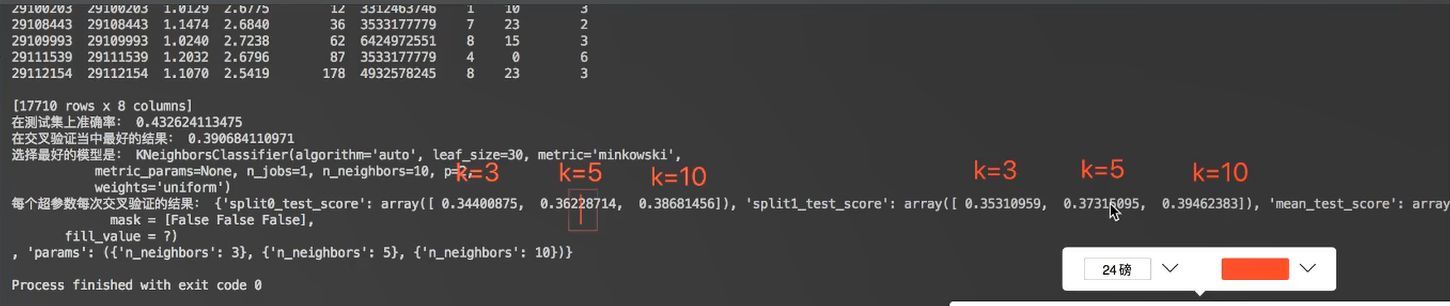